In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

import os, shutil, pathlib

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
orginal_dir = pathlib.Path("/home/ashok/workspace/dataset/PetImages/")
new_base_dir = pathlib.Path("/home/ashok/workspace/dataset/cats_vs_dogs_small/")

In [16]:
# def make_subset(subset_name, start_idx, end_idx):

#     for category in ("Cat", "Dog"):
#         dir = new_base_dir/subset_name/category
#         os.makedirs(dir)
#         fnames_src = [f"{category}/{i}.jpg" for i in range(start_idx, end_idx)] 
#         fnames = [f"{category}.{i}.jpg" for i in range(start_idx, end_idx)] 
#         for fname, fname_src in zip(fnames, fnames_src):
#             try:
#                 shutil.copyfile(src=orginal_dir/fname_src, dst=dir/fname)
#             except IOError as e:
#                 print(e)

In [18]:
# make_subset("train", start_idx=0, end_idx=1000)
# make_subset("validation", start_idx=1000, end_idx=1500)
# make_subset("test", start_idx=1500, end_idx=2500)

[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/11.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/12.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/19.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/23.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/53.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/59.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/61.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/80.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/88.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/140.jpg'
[Errno 2] No such file or directory: '/home/ashok/workspace/dataset/PetImages/Cat/147.jpg'
[Errno 2

In [19]:
inputs = keras.Input(shape=(180,180,3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs, outputs)

2022-08-09 22:09:10.826290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-09 22:09:10.827754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 22:09:10.827984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 22:09:10.828115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

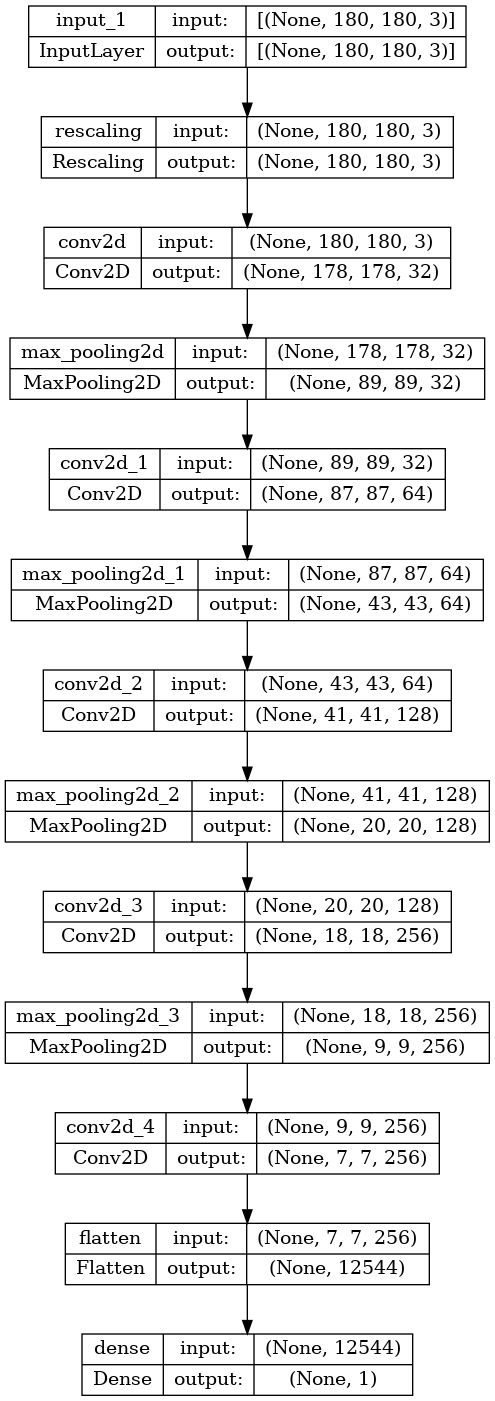

In [22]:
keras.utils.plot_model(model, show_shapes=True)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [26]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [27]:
# calling image_dataset_from_directory function will list the sub-directories & assume each as a single class
# this function returns tf.data.Dataset object

train_dataset = keras.utils.image_dataset_from_directory(
    new_base_dir/"train",
    image_size=(180,180),
    batch_size=32
)

val_dataset = keras.utils.image_dataset_from_directory(
    new_base_dir/"validation",
    image_size=(180,180),
    batch_size=32
)

test_dataset = keras.utils.image_dataset_from_directory(
    new_base_dir/"test",
    image_size=(180,180),
    batch_size=32
)

Found 1875 files belonging to 2 classes.
Found 941 files belonging to 2 classes.
Found 1862 files belonging to 2 classes.


**Tensorflow Dataset class**

In [28]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [31]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i>=2:
        break

(16,)
(16,)
(16,)


In [32]:
# batch data
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i>=2:
        break

(32, 16)
(32, 16)
(32, 16)


In [33]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i>=2:
        break

(4, 4)
(4, 4)
(4, 4)


**Back to Image classifier from scratch**

In [34]:
for data_batch, label_batch in train_dataset:
    print(f"data batch shape = {data_batch.shape}")
    print(f"label batch shape = {label_batch.shape}")
    break

data batch shape = (32, 180, 180, 3)
label batch shape = (32,)


In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoints/ch08-convnets-from-scratch/convnets_from_scratch.keras",
        save_best_only = True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9845

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 45ms/step - loss: 0.0544 - accuracy: 0.9845 - val_loss: 2.5721 - val_accuracy: 0.6780
Epoch 2/30
59/59 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9851

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0620 - accuracy: 0.9851 - val_loss: 2.4570 - val_accuracy: 0.6929
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9893

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0259 - accuracy: 0.9893 - val_loss: 2.8618 - val_accuracy: 0.7152
Epoch 4/30
59/59 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9915

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0312 - accuracy: 0.9915 - val_loss: 3.1444 - val_accuracy: 0.7078
Epoch 5/30
59/59 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9867

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 45ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 2.4277 - val_accuracy: 0.7173
Epoch 6/30
59/59 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9936

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 2.5094 - val_accuracy: 0.7418
Epoch 7/30
59/59 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9893

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 3.0161 - val_accuracy: 0.7226
Epoch 8/30
59/59 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9904

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0269 - accuracy: 0.9904 - val_loss: 2.6517 - val_accuracy: 0.7460
Epoch 9/30
59/59 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9888

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0472 - accuracy: 0.9888 - val_loss: 3.6111 - val_accuracy: 0.6961
Epoch 10/30
59/59 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9877

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0359 - accuracy: 0.9877 - val_loss: 3.4975 - val_accuracy: 0.7226
Epoch 11/30
59/59 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9861

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0651 - accuracy: 0.9861 - val_loss: 3.8652 - val_accuracy: 0.7109
Epoch 12/30
59/59 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9909

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0631 - accuracy: 0.9909 - val_loss: 3.4074 - val_accuracy: 0.7269
Epoch 13/30
59/59 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9952

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0259 - accuracy: 0.9952 - val_loss: 3.7778 - val_accuracy: 0.7088
Epoch 14/30
59/59 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9883

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0578 - accuracy: 0.9883 - val_loss: 3.5812 - val_accuracy: 0.7269
Epoch 15/30
59/59 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9931

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0175 - accuracy: 0.9931 - val_loss: 4.0553 - val_accuracy: 0.7333
Epoch 16/30
59/59 [==============================] - ETA: 0s - loss: 0.0746 - accuracy: 0.9883

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0746 - accuracy: 0.9883 - val_loss: 3.6831 - val_accuracy: 0.7375
Epoch 17/30
59/59 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9941

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0294 - accuracy: 0.9941 - val_loss: 3.8079 - val_accuracy: 0.7386
Epoch 18/30
59/59 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9899

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0383 - accuracy: 0.9899 - val_loss: 3.8984 - val_accuracy: 0.7279
Epoch 19/30
59/59 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9877

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0525 - accuracy: 0.9877 - val_loss: 4.1082 - val_accuracy: 0.7194
Epoch 20/30
59/59 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9813

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0687 - accuracy: 0.9813 - val_loss: 3.6495 - val_accuracy: 0.7216
Epoch 21/30
59/59 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9957

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 5.2862 - val_accuracy: 0.7216
Epoch 22/30
59/59 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9920

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 4.2012 - val_accuracy: 0.7056
Epoch 23/30
59/59 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9893

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0434 - accuracy: 0.9893 - val_loss: 3.9806 - val_accuracy: 0.7194
Epoch 24/30
59/59 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9936

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 3.9234 - val_accuracy: 0.7535
Epoch 25/30
59/59 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9920

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0414 - accuracy: 0.9920 - val_loss: 4.6767 - val_accuracy: 0.7258
Epoch 26/30
59/59 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9893

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 43ms/step - loss: 0.0487 - accuracy: 0.9893 - val_loss: 3.9858 - val_accuracy: 0.7248
Epoch 27/30
59/59 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9877

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0602 - accuracy: 0.9877 - val_loss: 4.6373 - val_accuracy: 0.7226
Epoch 28/30
59/59 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9957

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 4.9380 - val_accuracy: 0.7258
Epoch 29/30
59/59 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9904

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0765 - accuracy: 0.9904 - val_loss: 5.1909 - val_accuracy: 0.7046
Epoch 30/30
59/59 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9925

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 44ms/step - loss: 0.0332 - accuracy: 0.9925 - val_loss: 5.6381 - val_accuracy: 0.7099


<Figure size 432x288 with 0 Axes>

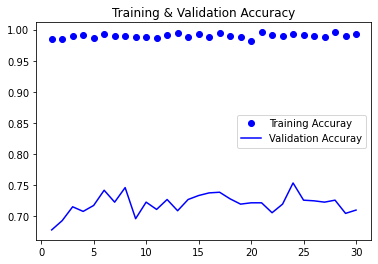

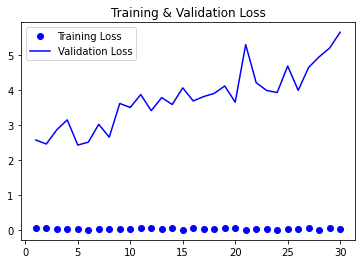

<Figure size 432x288 with 0 Axes>

In [39]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training Accuray")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuray")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.figure()

In [40]:
test_model = keras.models.load_model("checkpoints/ch08-convnets-from-scratch/convnets_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_acc:.3f}")

35/59 [================>.............] - ETA: 0s - loss: 2.3938 - accuracy: 0.7063

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


59/59 [==============================] - 1s 20ms/step - loss: 2.3541 - accuracy: 0.7191
test accuracy: 0.719


In [41]:
data_aug = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

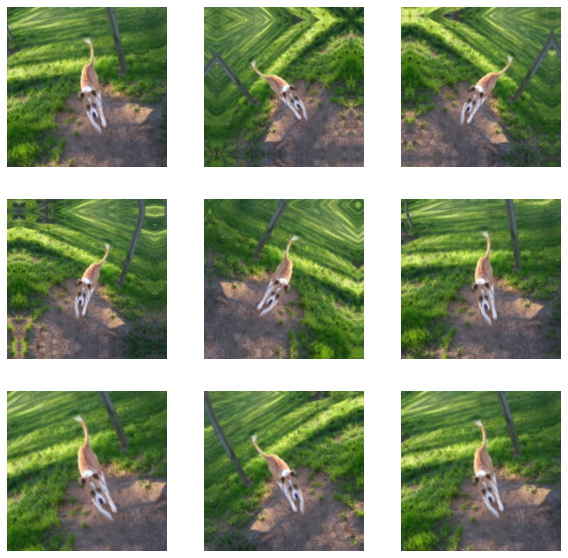

In [42]:
plt.figure(figsize=(10,10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_aug(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [47]:
inputs = keras.Input(shape=(180,180,3))

x = data_aug(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs, outputs)

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [49]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoints/ch08-convnets-from-scratch/convnets_from_scratch_with_augmentation.keras",
        save_best_only = True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/100
59/59 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.5205

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 5s 65ms/step - loss: 0.7485 - accuracy: 0.5205 - val_loss: 0.6937 - val_accuracy: 0.4942
Epoch 2/100
59/59 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5253

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 54ms/step - loss: 0.6959 - accuracy: 0.5253 - val_loss: 0.6827 - val_accuracy: 0.6132
Epoch 3/100
59/59 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5653

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.6865 - accuracy: 0.5653 - val_loss: 0.6784 - val_accuracy: 0.5579
Epoch 4/100
59/59 [==============================] - ETA: 0s - loss: 0.6674 - accuracy: 0.6144

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.6674 - accuracy: 0.6144 - val_loss: 0.6480 - val_accuracy: 0.6068
Epoch 5/100
58/59 [============================>.] - ETA: 0s - loss: 0.6621 - accuracy: 0.6304

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.6617 - accuracy: 0.6304 - val_loss: 0.6370 - val_accuracy: 0.6334
Epoch 6/100
59/59 [==============================] - ETA: 0s - loss: 0.6317 - accuracy: 0.6507

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 54ms/step - loss: 0.6317 - accuracy: 0.6507 - val_loss: 0.6583 - val_accuracy: 0.6196
Epoch 7/100
59/59 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.6736

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.6156 - accuracy: 0.6736 - val_loss: 0.6333 - val_accuracy: 0.6472
Epoch 8/100
59/59 [==============================] - ETA: 0s - loss: 0.6120 - accuracy: 0.6651

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.6120 - accuracy: 0.6651 - val_loss: 0.5786 - val_accuracy: 0.6833
Epoch 9/100
59/59 [==============================] - ETA: 0s - loss: 0.6133 - accuracy: 0.6843

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.6133 - accuracy: 0.6843 - val_loss: 0.5635 - val_accuracy: 0.7088
Epoch 10/100
58/59 [============================>.] - ETA: 0s - loss: 0.5691 - accuracy: 0.7204

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.5677 - accuracy: 0.7216 - val_loss: 0.5405 - val_accuracy: 0.7216
Epoch 11/100
58/59 [============================>.] - ETA: 0s - loss: 0.5695 - accuracy: 0.7204

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.5686 - accuracy: 0.7211 - val_loss: 0.5127 - val_accuracy: 0.7609
Epoch 12/100
59/59 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.7317

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.5408 - accuracy: 0.7317 - val_loss: 1.1405 - val_accuracy: 0.6206
Epoch 13/100
58/59 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7263

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.5466 - accuracy: 0.7275 - val_loss: 0.5117 - val_accuracy: 0.7503
Epoch 14/100
58/59 [============================>.] - ETA: 0s - loss: 0.5232 - accuracy: 0.7505

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.5216 - accuracy: 0.7515 - val_loss: 0.4974 - val_accuracy: 0.7620
Epoch 15/100
58/59 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.7640

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.5014 - accuracy: 0.7643 - val_loss: 0.4954 - val_accuracy: 0.7620
Epoch 16/100
59/59 [==============================] - ETA: 0s - loss: 0.4815 - accuracy: 0.7589

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 67ms/step - loss: 0.4815 - accuracy: 0.7589 - val_loss: 0.6771 - val_accuracy: 0.7173
Epoch 17/100
59/59 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.7733

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 54ms/step - loss: 0.4921 - accuracy: 0.7733 - val_loss: 0.5259 - val_accuracy: 0.7439
Epoch 18/100
59/59 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.7824

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.4705 - accuracy: 0.7824 - val_loss: 0.5242 - val_accuracy: 0.7705
Epoch 19/100
58/59 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.7721

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.4812 - accuracy: 0.7739 - val_loss: 0.5031 - val_accuracy: 0.7620
Epoch 20/100
59/59 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.7883

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.4682 - accuracy: 0.7883 - val_loss: 0.4269 - val_accuracy: 0.8013
Epoch 21/100
58/59 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.7936

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4448 - accuracy: 0.7941 - val_loss: 0.5077 - val_accuracy: 0.7726
Epoch 22/100
59/59 [==============================] - ETA: 0s - loss: 0.4411 - accuracy: 0.8011

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4411 - accuracy: 0.8011 - val_loss: 0.5357 - val_accuracy: 0.7928
Epoch 23/100
59/59 [==============================] - ETA: 0s - loss: 0.4357 - accuracy: 0.8043

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.4357 - accuracy: 0.8043 - val_loss: 0.4576 - val_accuracy: 0.8140
Epoch 24/100
59/59 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.8080

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4268 - accuracy: 0.8080 - val_loss: 0.4871 - val_accuracy: 0.7662
Epoch 25/100
59/59 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.8075

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4415 - accuracy: 0.8075 - val_loss: 0.4549 - val_accuracy: 0.7843
Epoch 26/100
58/59 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8044

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4227 - accuracy: 0.8048 - val_loss: 0.4488 - val_accuracy: 0.8204
Epoch 27/100
58/59 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8233

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.4059 - accuracy: 0.8240 - val_loss: 0.4311 - val_accuracy: 0.8215
Epoch 28/100
58/59 [============================>.] - ETA: 0s - loss: 0.3870 - accuracy: 0.8303

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3849 - accuracy: 0.8315 - val_loss: 0.4830 - val_accuracy: 0.7970
Epoch 29/100
58/59 [============================>.] - ETA: 0s - loss: 0.3966 - accuracy: 0.8200

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.3977 - accuracy: 0.8187 - val_loss: 0.6926 - val_accuracy: 0.7354
Epoch 30/100
58/59 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8335

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.3967 - accuracy: 0.8347 - val_loss: 0.4583 - val_accuracy: 0.8172
Epoch 31/100
59/59 [==============================] - ETA: 0s - loss: 0.3758 - accuracy: 0.8368

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3758 - accuracy: 0.8368 - val_loss: 0.4854 - val_accuracy: 0.8002
Epoch 32/100
59/59 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8475

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 54ms/step - loss: 0.3502 - accuracy: 0.8475 - val_loss: 0.4817 - val_accuracy: 0.7970
Epoch 33/100
58/59 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8513

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.3515 - accuracy: 0.8507 - val_loss: 0.4813 - val_accuracy: 0.7875
Epoch 34/100
59/59 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.8512

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.3487 - accuracy: 0.8512 - val_loss: 0.4562 - val_accuracy: 0.8225
Epoch 35/100
59/59 [==============================] - ETA: 0s - loss: 0.3229 - accuracy: 0.8640

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3229 - accuracy: 0.8640 - val_loss: 0.4652 - val_accuracy: 0.8119
Epoch 36/100
59/59 [==============================] - ETA: 0s - loss: 0.3620 - accuracy: 0.8453

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3620 - accuracy: 0.8453 - val_loss: 0.4054 - val_accuracy: 0.8353
Epoch 37/100
59/59 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.8592

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.3133 - accuracy: 0.8592 - val_loss: 0.4215 - val_accuracy: 0.8395
Epoch 38/100
59/59 [==============================] - ETA: 0s - loss: 0.3314 - accuracy: 0.8608

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.3314 - accuracy: 0.8608 - val_loss: 0.4639 - val_accuracy: 0.8172
Epoch 39/100
59/59 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8736

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3176 - accuracy: 0.8736 - val_loss: 0.5464 - val_accuracy: 0.7875
Epoch 40/100
59/59 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8704

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3169 - accuracy: 0.8704 - val_loss: 0.4369 - val_accuracy: 0.8332
Epoch 41/100
58/59 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8782

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.2927 - accuracy: 0.8773 - val_loss: 0.6222 - val_accuracy: 0.7683
Epoch 42/100
58/59 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8815

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.3011 - accuracy: 0.8816 - val_loss: 0.4226 - val_accuracy: 0.8247
Epoch 43/100
58/59 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.8879

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 65ms/step - loss: 0.2887 - accuracy: 0.8880 - val_loss: 0.6281 - val_accuracy: 0.7949
Epoch 44/100
59/59 [==============================] - ETA: 0s - loss: 0.2979 - accuracy: 0.8693

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2979 - accuracy: 0.8693 - val_loss: 0.4125 - val_accuracy: 0.8417
Epoch 45/100
59/59 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8923

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2727 - accuracy: 0.8923 - val_loss: 0.4913 - val_accuracy: 0.8321
Epoch 46/100
58/59 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.8917

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2699 - accuracy: 0.8923 - val_loss: 0.4365 - val_accuracy: 0.8342
Epoch 47/100
58/59 [============================>.] - ETA: 0s - loss: 0.2832 - accuracy: 0.8906

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2817 - accuracy: 0.8912 - val_loss: 0.4409 - val_accuracy: 0.8374
Epoch 48/100
59/59 [==============================] - ETA: 0s - loss: 0.2593 - accuracy: 0.8864

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.2593 - accuracy: 0.8864 - val_loss: 0.4496 - val_accuracy: 0.8417
Epoch 49/100
59/59 [==============================] - ETA: 0s - loss: 0.2801 - accuracy: 0.8811

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2801 - accuracy: 0.8811 - val_loss: 0.4630 - val_accuracy: 0.8332
Epoch 50/100
59/59 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.8827

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.2892 - accuracy: 0.8827 - val_loss: 0.3838 - val_accuracy: 0.8417
Epoch 51/100
58/59 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.8944

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2689 - accuracy: 0.8939 - val_loss: 0.3907 - val_accuracy: 0.8427
Epoch 52/100
58/59 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.8949

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.2575 - accuracy: 0.8955 - val_loss: 0.4277 - val_accuracy: 0.8491
Epoch 53/100
59/59 [==============================] - ETA: 0s - loss: 0.2480 - accuracy: 0.9024

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.2480 - accuracy: 0.9024 - val_loss: 0.5236 - val_accuracy: 0.8204
Epoch 54/100
58/59 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.8949

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2434 - accuracy: 0.8960 - val_loss: 0.5361 - val_accuracy: 0.8321
Epoch 55/100
58/59 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.8890

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 61ms/step - loss: 0.2641 - accuracy: 0.8885 - val_loss: 0.4683 - val_accuracy: 0.8257
Epoch 56/100
58/59 [============================>.] - ETA: 0s - loss: 0.2325 - accuracy: 0.9095

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.2314 - accuracy: 0.9099 - val_loss: 0.8325 - val_accuracy: 0.8193
Epoch 57/100
59/59 [==============================] - ETA: 0s - loss: 0.2245 - accuracy: 0.9120

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.2245 - accuracy: 0.9120 - val_loss: 0.6947 - val_accuracy: 0.8055
Epoch 58/100
59/59 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.9035

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2394 - accuracy: 0.9035 - val_loss: 0.4510 - val_accuracy: 0.8268
Epoch 59/100
59/59 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9163

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2175 - accuracy: 0.9163 - val_loss: 0.5072 - val_accuracy: 0.8470
Epoch 60/100
58/59 [============================>.] - ETA: 0s - loss: 0.2436 - accuracy: 0.8987

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.2438 - accuracy: 0.8987 - val_loss: 0.4689 - val_accuracy: 0.8363
Epoch 61/100
59/59 [==============================] - ETA: 0s - loss: 0.2552 - accuracy: 0.9008

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.2552 - accuracy: 0.9008 - val_loss: 0.4990 - val_accuracy: 0.8215
Epoch 62/100
58/59 [============================>.] - ETA: 0s - loss: 0.2295 - accuracy: 0.9084

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2287 - accuracy: 0.9088 - val_loss: 0.5548 - val_accuracy: 0.8172
Epoch 63/100
59/59 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9211

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 57ms/step - loss: 0.2082 - accuracy: 0.9211 - val_loss: 0.6256 - val_accuracy: 0.8236
Epoch 64/100
58/59 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9170

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2074 - accuracy: 0.9179 - val_loss: 0.5645 - val_accuracy: 0.8427
Epoch 65/100
59/59 [==============================] - ETA: 0s - loss: 0.2281 - accuracy: 0.9131

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2281 - accuracy: 0.9131 - val_loss: 0.5403 - val_accuracy: 0.8459
Epoch 66/100
59/59 [==============================] - ETA: 0s - loss: 0.2052 - accuracy: 0.9232

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2052 - accuracy: 0.9232 - val_loss: 0.5657 - val_accuracy: 0.8321
Epoch 67/100
59/59 [==============================] - ETA: 0s - loss: 0.2029 - accuracy: 0.9221

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2029 - accuracy: 0.9221 - val_loss: 0.4914 - val_accuracy: 0.8555
Epoch 68/100
59/59 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9184

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2086 - accuracy: 0.9184 - val_loss: 0.8865 - val_accuracy: 0.7928
Epoch 69/100
59/59 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9099

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2314 - accuracy: 0.9099 - val_loss: 0.5030 - val_accuracy: 0.8618
Epoch 70/100
59/59 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9291

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.1944 - accuracy: 0.9291 - val_loss: 0.6107 - val_accuracy: 0.8470
Epoch 71/100
58/59 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.9262

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2031 - accuracy: 0.9248 - val_loss: 0.6762 - val_accuracy: 0.8140
Epoch 72/100
59/59 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9248

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 59ms/step - loss: 0.2082 - accuracy: 0.9248 - val_loss: 0.6176 - val_accuracy: 0.8406
Epoch 73/100
59/59 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.9200

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2159 - accuracy: 0.9200 - val_loss: 0.6078 - val_accuracy: 0.8395
Epoch 74/100
58/59 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9159

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2111 - accuracy: 0.9168 - val_loss: 0.5348 - val_accuracy: 0.8502
Epoch 75/100
58/59 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9240

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1935 - accuracy: 0.9243 - val_loss: 0.6141 - val_accuracy: 0.8608
Epoch 76/100
59/59 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.9157

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2321 - accuracy: 0.9157 - val_loss: 0.5984 - val_accuracy: 0.8417
Epoch 77/100
58/59 [============================>.] - ETA: 0s - loss: 0.1654 - accuracy: 0.9321

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.1643 - accuracy: 0.9328 - val_loss: 0.6009 - val_accuracy: 0.8682
Epoch 78/100
58/59 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9213

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.2011 - accuracy: 0.9211 - val_loss: 0.6032 - val_accuracy: 0.8332
Epoch 79/100
59/59 [==============================] - ETA: 0s - loss: 0.2059 - accuracy: 0.9227

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2059 - accuracy: 0.9227 - val_loss: 0.6026 - val_accuracy: 0.8491
Epoch 80/100
59/59 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9371

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.1651 - accuracy: 0.9371 - val_loss: 0.5823 - val_accuracy: 0.8438
Epoch 81/100
58/59 [============================>.] - ETA: 0s - loss: 0.1630 - accuracy: 0.9402

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.1639 - accuracy: 0.9403 - val_loss: 0.8467 - val_accuracy: 0.8332
Epoch 82/100
59/59 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9264

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.1968 - accuracy: 0.9264 - val_loss: 0.6515 - val_accuracy: 0.8406
Epoch 83/100
58/59 [============================>.] - ETA: 0s - loss: 0.1817 - accuracy: 0.9359

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1817 - accuracy: 0.9360 - val_loss: 0.6257 - val_accuracy: 0.8438
Epoch 84/100
58/59 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9316

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1993 - accuracy: 0.9323 - val_loss: 0.6630 - val_accuracy: 0.8597
Epoch 85/100
59/59 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9339

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 55ms/step - loss: 0.1869 - accuracy: 0.9339 - val_loss: 0.6498 - val_accuracy: 0.8374
Epoch 86/100
58/59 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9321

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.1832 - accuracy: 0.9323 - val_loss: 0.6488 - val_accuracy: 0.8247
Epoch 87/100
59/59 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9339

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1774 - accuracy: 0.9339 - val_loss: 0.4780 - val_accuracy: 0.8565
Epoch 88/100
59/59 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9435

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1706 - accuracy: 0.9435 - val_loss: 0.5415 - val_accuracy: 0.8608
Epoch 89/100
59/59 [==============================] - ETA: 0s - loss: 0.1797 - accuracy: 0.9349

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.1797 - accuracy: 0.9349 - val_loss: 0.6287 - val_accuracy: 0.8555
Epoch 90/100
59/59 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.9371

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.1815 - accuracy: 0.9371 - val_loss: 0.8957 - val_accuracy: 0.8533
Epoch 91/100
58/59 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.9434

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.1745 - accuracy: 0.9435 - val_loss: 0.9080 - val_accuracy: 0.8438
Epoch 92/100
58/59 [============================>.] - ETA: 0s - loss: 0.1702 - accuracy: 0.9364

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1690 - accuracy: 0.9371 - val_loss: 0.5611 - val_accuracy: 0.8502
Epoch 93/100
59/59 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9275

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 56ms/step - loss: 0.2106 - accuracy: 0.9275 - val_loss: 0.5417 - val_accuracy: 0.8555
Epoch 94/100
58/59 [============================>.] - ETA: 0s - loss: 0.1729 - accuracy: 0.9348

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1726 - accuracy: 0.9344 - val_loss: 0.8370 - val_accuracy: 0.7960
Epoch 95/100
59/59 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9339

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.1781 - accuracy: 0.9339 - val_loss: 0.5844 - val_accuracy: 0.8523
Epoch 96/100
59/59 [==============================] - ETA: 0s - loss: 0.1487 - accuracy: 0.9408

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 58ms/step - loss: 0.1487 - accuracy: 0.9408 - val_loss: 0.6306 - val_accuracy: 0.8502
Epoch 97/100
59/59 [==============================] - ETA: 0s - loss: 0.1890 - accuracy: 0.9317

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1890 - accuracy: 0.9317 - val_loss: 0.6121 - val_accuracy: 0.8502
Epoch 98/100
59/59 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9365

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1677 - accuracy: 0.9365 - val_loss: 0.6357 - val_accuracy: 0.8459
Epoch 99/100
58/59 [============================>.] - ETA: 0s - loss: 0.1724 - accuracy: 0.9407

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 4s 58ms/step - loss: 0.1719 - accuracy: 0.9408 - val_loss: 0.6406 - val_accuracy: 0.8629
Epoch 100/100
59/59 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.9451

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


59/59 [==============================] - 3s 57ms/step - loss: 0.1667 - accuracy: 0.9451 - val_loss: 0.6505 - val_accuracy: 0.8459


<Figure size 432x288 with 0 Axes>

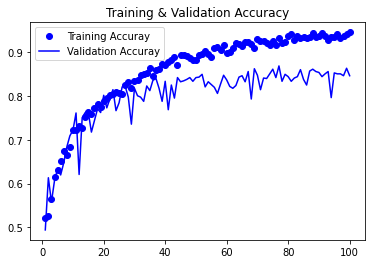

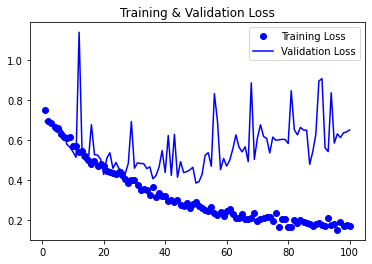

<Figure size 432x288 with 0 Axes>

In [50]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training Accuray")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuray")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.figure()

In [51]:
test_model = keras.models.load_model("checkpoints/ch08-convnets-from-scratch/convnets_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_acc:.3f}")

34/59 [================>.............] - ETA: 0s - loss: 0.4831 - accuracy: 0.8208

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


59/59 [==============================] - 1s 19ms/step - loss: 0.4838 - accuracy: 0.8212
test accuracy: 0.821
